In [23]:
import numpy as np
import itertools 
import ezc3d
import matplotlib.pyplot as plt
from pathlib import Path
from math import sqrt
from tqdm import tqdm

In [57]:
from pyomeca import Analogs

data_path = r"C:\Users\gmultimedia.PJATK8\Desktop\PJATK_K\2020-08-10-B0450-S01-E01-T02.c3d"
muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]
muscles_names = ["Czworoboczny grzbietu","Trójgłowy ramienia", "Dwugłowy ramienia", "Prostownik nadgarstka","Skośny brzucha", "Pośladkowy średni","Czworogłowy uda", "Brzuchaty łydki"]


emg = Analogs.from_c3d(data_path, usecols=muscles)
#emg.plot(x="time", col="channel", col_wrap=3)
emg.plot(x="time", col="channel", col_wrap=3)
#emg.plot(x="time", col=muscles_names, col_wrap=3)


TypeError: unhashable type: 'list'

In [47]:
emg.plot(x="time", col="channel", col_wrap=3)



AttributeError: 'DataArray' object has no attribute 'subplot'

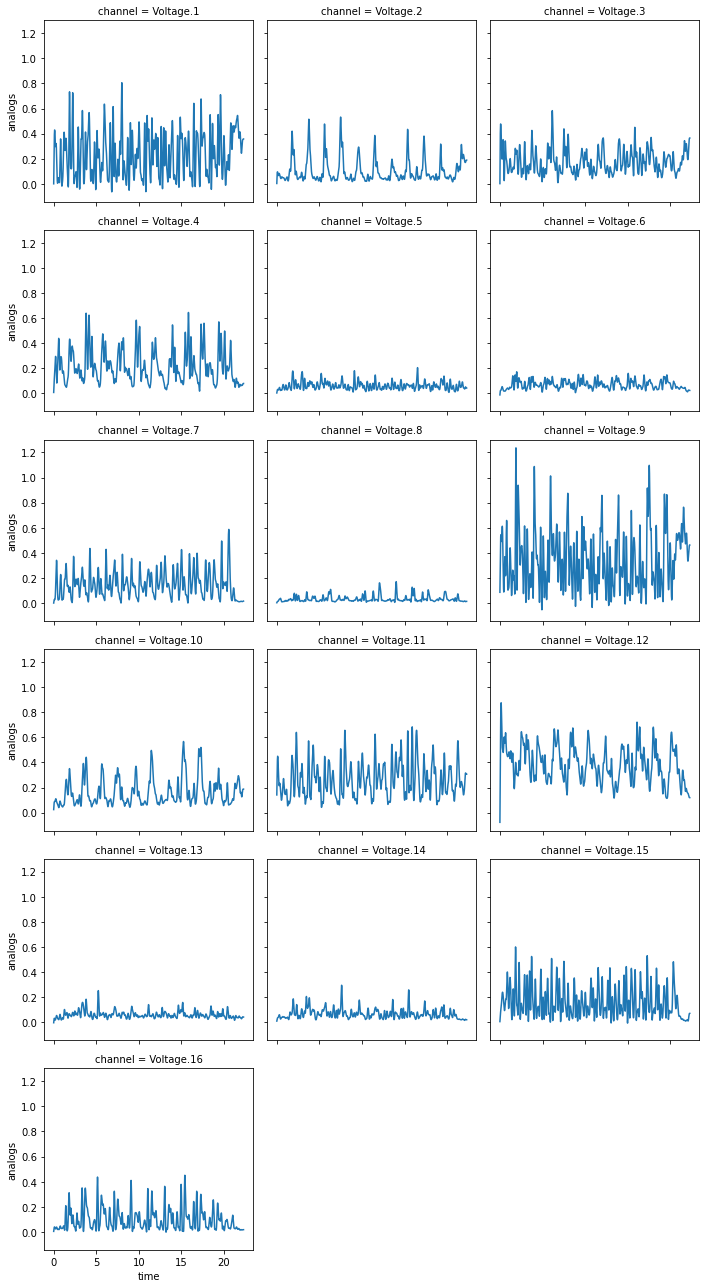

In [56]:
emg_processed = (
    emg.meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize()
)

emg_processed.plot(x="time", col="channel", col_wrap=3)